# Базовый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

In [2]:
#импортируем все что нужно в ДЗ6, чтобы более не отвлекатся 
import pandas as pd
# Заклинание, нужное для отрисовки графиков непосредственно в ноутбуке (подробнее в лекции 7)
%matplotlib inline
# Настройка стиля и размера графиков
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.pyplot.style.use('ggplot')

## Задание 1.1

Загрузите первый лист (`curr`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены курсы доллара (USD) и евро (EUR) в рублях).

In [3]:
df = pd.read_excel('data.xlsx', sheetname='curr')
df.head(3)

,Date,USD,EUR
0,2013-06-22,32.7433,43.3489
1,2013-06-25,32.9097,43.1018
2,2013-06-26,32.7140,42.9698


## Задание 1.2

Выведите на экран тип поля `Date`. Если это `datetime64[ns]` или `<M8[ns]` (по сути то же самое), то мы имеем дело с правильным форматом даты. Если нет, приведите этот столбец к типу `datetime`.

In [3]:
type(df.Date.iloc[0])

pandas.tslib.Timestamp

## Задание 1.3

Выведите на экран минимальную и максимальную дату. Сколько всего дней содержится в наших данных? (*Hint: даты можно вычитать друг из друга*)

In [5]:
#убираем лишнее .date()
print df.Date.min().date()
print df.Date.max().date()
print (df.Date.max().date() - df.Date.min().date()).days

2013-06-22
2017-06-21
1460


## Задание 1.4

Постройте на одном графике курс доллара и курс евро.

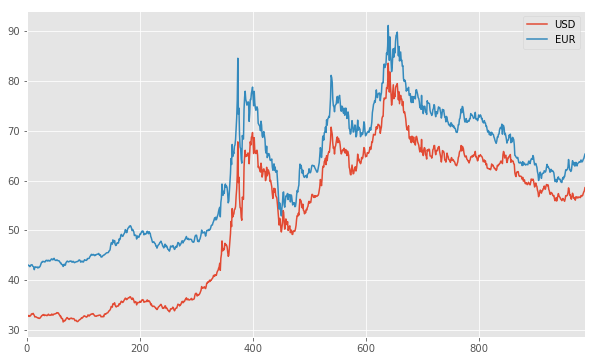

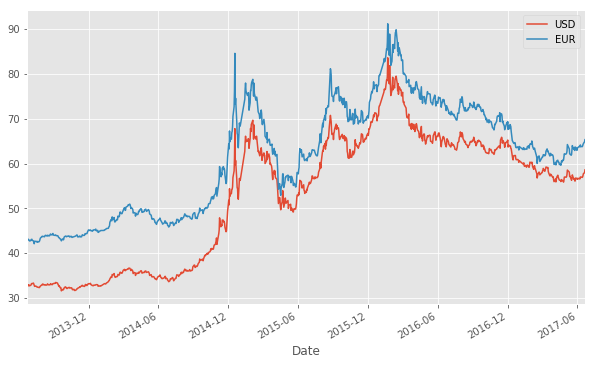

In [4]:
#по-умолчанию
df.plot()
#дата - индекс
df.set_index('Date')[['USD','EUR']].plot()


## Задание 1.5

Найдите среднее значение курса евро в мае 2017 года.

In [7]:
df.loc[(df.Date.dt.month == 5)&(df.Date.dt.year == 2017)].EUR.mean()

62.95527368421053

# Продвинутый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 2.1

Найдите долю дней, когда доллар растет.

In [5]:
((df - df.shift()).USD>0).mean() * 100

52.631578947368418

## Задание 2.2

Постройте гистограмму доходности доллара.

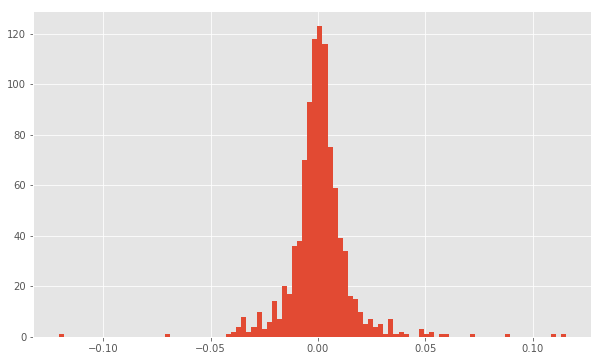

In [14]:
#гистограмма доходности
df.pct_change().USD.hist(bins=100)

## Задание 2.3

Добавьте в таблицу новую колонку `Weekday` – день недели на русском языке, т.е. строку со значением `u'понедельник'`, `u'вторник'` и т.д. (*Hint: удобно воспользоваться атрибутом* `.dt`)

In [15]:
#дни недели на русском
wds = [u'понедельник',u'вторник',u'среда',u'четверг',u'пятница',u'суббота',u'воскресенье']
#используем dt
df['Weekday'] = df.index.to_series().dt.weekday.apply(lambda x : wds[x])
df

,USD,EUR,Weekday
Date,,,
2013-06-22,32.7433,43.3489,суббота
2013-06-25,32.9097,43.1018,вторник
2013-06-26,32.7140,42.9698,среда
2013-06-27,32.8876,42.9841,четверг
2013-06-28,32.8766,42.8349,пятница
2013-06-29,32.7090,42.7180,суббота
2013-07-02,32.8517,42.8025,вторник
2013-07-03,32.9475,43.0525,среда
2013-07-04,33.2204,43.0736,четверг


## Задание 2.4

Рассчитайте корреляцию между курсами доллара и евро за весь доступный период (*Hint: в pandas уже встроена функция для расчета корреляций*).

In [9]:
df.corr()

,USD,EUR
USD,1.000000,0.982309
EUR,0.982309,1.000000


## Задание 2.5

Несколько лет назад курс евро отличался от курса доллара значительно сильнее, чем сейчас. Чтобы это визуализировать, вычислите курс евро к доллару (т.е. "сколько долларов стоит один евро") за каждый день. Постройте график курса евро к доллару за весь доступный период.

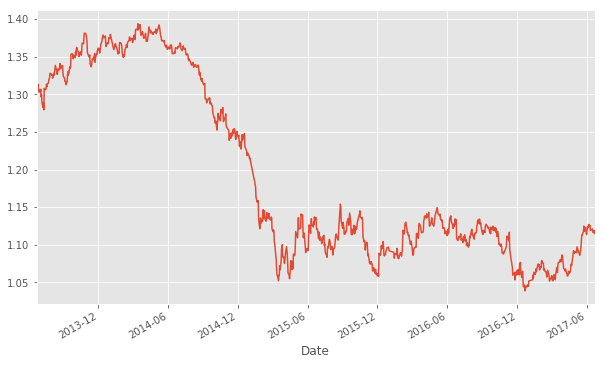

In [18]:
(df.EUR / df.USD).plot()

# Сложный уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 3.1

Загрузите второй лист (`oil`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены цены за баррель нефти Brent в долларах США).

In [10]:
df_oil = pd.read_excel('data.xlsx', sheetname='oil')

In [11]:
#проверка типа даты
type(df_oil.dt.iloc[0])

pandas.tslib.Timestamp

In [12]:
df_oil.head(3)

,dt,Brent
0,2013-01-02,112.98
1,2013-01-03,113.03
2,2013-01-04,112.58


## Задание 3.2

Объедините обе таблицы в одну. Итоговая таблица должна содержать дату в качестве индекса, а также поля `USD` (доллар), `EUR` (евро) и `Brent` (нефть). Обратите внимание, что периоды, за которые доступны данные, немного отличаются для курсов валют и для нефти. Нас интересует только тот период, когда и те, и другие данные присутствуют.

In [24]:
df_all = pd.merge(df, df_oil, how='inner', left_index=True, right_on='dt').rename(columns={'dt' : 'Date'}).set_index('Date')
df_all.tail(10)

,USD,EUR,Brent
Date,,,
2017-05-25,56.2743,62.9203,52.25
2017-05-26,56.0701,63.0116,50.84
2017-05-30,56.7106,63.3684,50.65
2017-05-31,56.5168,62.9484,49.40
2017-06-01,56.6876,63.4107,50.41
2017-06-02,56.5373,63.5310,48.46
2017-06-06,56.6152,63.8110,48.11
2017-06-07,56.6747,63.7817,47.08
2017-06-08,56.5878,63.7179,46.30


## Задание 3.3

- Постройте на одном графике курсы валют и цены на нефть. Поскольку цена на нефть имеет немного другой масштаб, используйте параметр `secondary_y='Brent'` для отображения дополнительной оси $y$ справа.
- Посчитайте попарные корреляции всех трех временных рядов за весь период.

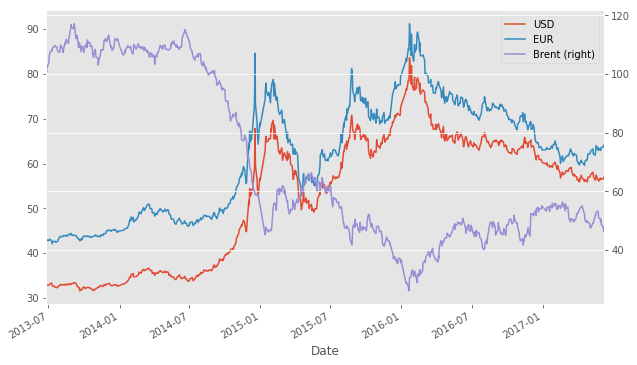

In [25]:
#курсы валют и цены на нефть на одном графике
df_all.plot(secondary_y='Brent')

In [28]:
#USD - EUR
df_all[['USD','EUR']].corr()

,USD,EUR
USD,1.000000,0.982142
EUR,0.982142,1.000000


In [29]:
#USD - Brent
df_all[['USD','Brent']].corr()

,USD,Brent
USD,1.00000,-0.97895
Brent,-0.97895,1.00000


In [30]:
#EUR - Brent
df_all[['EUR','Brent']].corr()

,EUR,Brent
EUR,1.000000,-0.938919
Brent,-0.938919,1.000000


## Задание 3.4

Определите, в какие дни недели лучше покупать евро, а в какие – продавать. Для этого рассчитайте среднюю доходность евро в разные дни недели (т.е. нужно сгруппировать таблицу по дням недели и рассчитать среднее процентное изменение курса евро в каждой группе).

## Задание 3.5

Постройте график "скользящей корреляции" между курсами доллара и евро (таким образом можно найти периоды, когда курсы коррелировали слабее обычного и использовать это для арбитража). Для этого нужно взять скользящее окно (например, 60 последних значений) и рассчитать корреляцию USD - EUR внутри каждого такого окна.